### Installing the required libraries for the forecasting system.

In [1]:
!pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 15.1 MB/s eta 0:00:00


### Importing the required module. 

In [18]:
import pandas as pd
import numpy as np

class StockData :
    def __init__(self, name_of_stock, start_date, end_date, data_type="csv") :
        super(StockData, self).__init__()
        self. name_of_stock = name_of_stock
        self.start_date = start_date
        self.end_date = end_date
        self.data_type = data_type

    def getStockDataToCSV(self, **kwargs) :
        if self.data_type == "csv" :
            stock_data = yf.download(self.name_of_stock, start=self.start_date, end=self.end_date)
            if kwargs["verbose"] > -1 : 
                print("{}The Data is : {}".format("\n", "\n"))
                print(stock_data.head(kwargs["num_samples"]))
            result = stock_data.to_csv(kwargs["file_name"], encoding=kwargs["file_encoding"], index=True)
            return True
        else :
            print("Only CSV file is supported, change the data_type....")
            return False


if __name__ == "__main__" :
    STOCK = "AAPL"
    START = "2018-08-11" # Date in the format of yyyy-mm-dd
    END = "2019-08-11" # Date in the format of yyyy-mm-dd
    FILE_NAME = "{}-{}.csv".format(STOCK, END)
    VERBOSE = -2
    NUM_SAMPLES = 15
    ENCODING = "utf-8"

    stock = StockData(STOCK, START, END)
    result = stock.getStockDataToCSV(num_samples=NUM_SAMPLES, 
                                     verbose=VERBOSE, 
                                     file_name=FILE_NAME, 
                                     file_encoding=ENCODING)
    if result :
        print("Data Generated Successfully....")
    else :
        print("Internal Exception occured try again....")
        print("Try again....")


[*********************100%***********************]  1 of 1 completed
Data Generated Successfully....


In [8]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf

stock_data = yf.download('AAPL', start='2018-08-11', end='2019-08-11')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-13,52.327499,52.737499,51.924999,52.217499,50.223824,103563600
2018-08-14,52.540001,52.639999,52.064999,52.437500,50.435429,82992000
2018-08-15,52.305000,52.685001,52.082500,52.560001,50.553249,115230400
2018-08-16,52.937500,53.452499,52.867500,53.330002,51.293854,114001600
2018-08-17,53.360001,54.487499,53.290001,54.395000,52.318192,141708000


In [10]:
result = stock_data.to_csv("APPL-2019.csv", encoding='utf-8', index=True)

In [11]:
result

In [3]:
len(stock_data)

250

pandas.core.frame.DataFrame

Text(0, 0.5, 'Prices ($)')

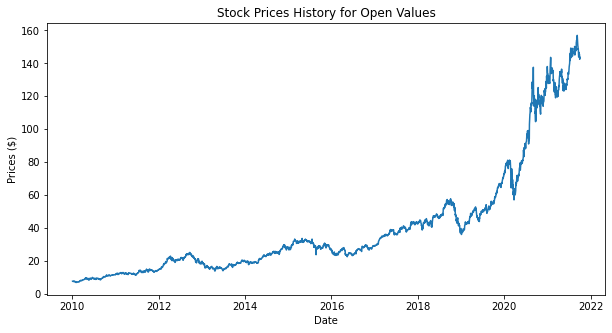

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Stock Prices History for Open Values')
plt.plot(stock_data["Open"])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

Text(0, 0.5, 'Prices ($)')

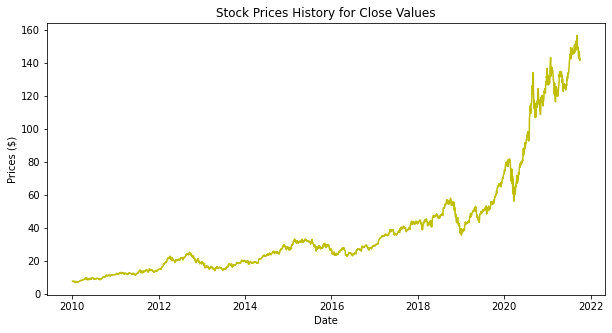

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Stock Prices History for Close Values')
plt.plot(stock_data["Close"], color="y")
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [ ]:
close_prices = stock_data['Close']
num_previous_days = 150

values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

x_train = []
y_train = []
x_test = []
y_test = values[training_data_len:]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

for i in range(num_previous_days, len(train_data)):
    x_train.append(train_data[i-num_previous_days:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_data_len-num_previous_days: , : ]

for i in range(num_previous_days, len(test_data)):
    x_test.append(test_data[i-num_previous_days:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
print("The shapes of the final training tensors are : {} and {}".format(x_train.shape, y_train.shape))
print("The shapes of the validation tensors are : {} and {}".format(x_test.shape, y_test.shape))

The shapes of the final training tensors are : (2216, 150, 1) and (2216,)
The shapes of the validation tensors are : (591, 150, 1) and (591,)


In [ ]:
import warnings     
warnings.filterwarnings("ignore")


class LSTMNeuralNetwork :
    def __init__(self, num_lstm_layers, lstm_config, learning_rate, optimizer_type) :
        super(LSTMNeuralNetwork, self).__init__()
        self.num_lstm_layers = num_lstm_layers
        self.lstm_config = lstm_config
        self.learning_rate = learning_rate
        self.optimizer_type = optimizer_type

    def CompoundLSTMNetwork(self, **kwargs) :
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.LSTM(kwargs["units"], return_sequences=True, 
                                       input_shape=(x_train.shape[1], 1)))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.27))
        model.add(tf.keras.layers.BatchNormalization())

        model.add(tf.keras.layers.LSTM(kwargs["units"] + kwargs["lstm_embedding"], 
                                       return_sequences=False, 
                                       dropout=kwargs["lstm_dropout"]))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.27))
        model.add(tf.keras.layers.BatchNormalization())

        model.add(tf.keras.layers.Dense(kwargs["num_mlp_neurons"]))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.27))
        model.add(tf.keras.layers.Dropout(rate=kwargs["mlp_dropout"]))
        model.add(tf.keras.layers.BatchNormalization())

        model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

        if self.optimizer_type == "adam" :
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate), 
                        loss='mean_squared_error', metrics=["mse"])
            return model
        elif self.optimizer_type == "rmsprop" :
            model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=self.learning_rate, 
                                                                momentum=0.45), 
                          loss="mean_squared_error", metrics=["mse"])
            return model
        elif self.optimizer_type == "nadam" :
            model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=self.learning_rate), 
                          loss="mean_squared_error", metrics=["mse"])
            return model

    def StackedLSTMNetwork(self, **kwargs) :
        init = tf.keras.initializers.glorot_normal(seed=None)
        init1 = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05)
        input_tensor = x = tf.keras.layers.Input(shape=(x_train.shape[1], 1))
        
        for i in range(self.num_lstm_layers) :
            name = 'layer_lstm_{0}'.format(i+1)
            if ( (i == 0) and (self.num_lstm_layers == 1) ):
                x = tf.keras.layers.LSTM(units=self.lstm_config[0], 
                                         dropout=kwargs["dropout"], 
                                         recurrent_dropout=kwargs["recurrent_dropout"], 
                        return_sequences=False, kernel_initializer=init, 
                        activation=kwargs["activation"], name=name)(x)
            elif (i != (self.num_lstm_layers - 1) ) :
                x = tf.keras.layers.LSTM(units=self.lstm_config[1], 
                                         dropout=kwargs["dropout"], 
                                         recurrent_dropout=kwargs["recurrent_dropout"],  
                        return_sequences=True, kernel_initializer=init, 
                        activation=kwargs["activation"], name=name)(x)
            else:
                x = tf.keras.layers.LSTM(units=self.lstm_config[2], 
                                         dropout=kwargs["dropout"], 
                                         recurrent_dropout=kwargs["recurrent_dropout"],  
                        return_sequences=False, kernel_initializer=init, 
                        activation=kwargs["activation"], name=name)(x)
        
        # Multi-Layered Perceptron Block
        x = tf.keras.layers.Dense(250)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(rate=0.20)(x)
        x = tf.keras.layers.Dense(50)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(rate=0.10)(x)

        x = tf.keras.layers.Dense(1, activation='linear', kernel_initializer= init1)(x)

        model = tf.keras.models.Model(input_tensor, x)
        if self.optimizer_type == "rmsprop" :
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=self.learning_rate, rho=0.9, epsilon=None, decay=0.0, momentum=0.45)
            model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
            return model
        elif self.optimizer_type == "adam" :
            optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
            model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mse"])
            return model
        elif self.optimizer_type == "nadam" :
            optimizer = tf.keras.optimizers.Nadam(learning_rate=self.learning_rate)
            model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mse"])
            return model
        else :
            optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
            model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mse"])


# Tuneable Hyper-Parameters for the System
num_internal_lstm_layers = 2
network_configuration = [100, 200, 100]
learningRate = 0.00025
optimizerType = "adam"
num_epochs = 50
batch_size = 128
validation_split = 0.2

# Initialization of the LSTM Neural Network Class
nn = LSTMNeuralNetwork(num_internal_lstm_layers, network_configuration, 
                         learningRate, optimizerType)

# The First Model
model_1 = nn.StackedLSTMNetwork(dropout=0.25, recurrent_dropout=0.25, 
                                  activation="relu")
print("{}The First Internal Model Architectural Details Are : {}".format("\n", "\n"))
print(model_1.summary())

print("\n")

# The Second Model
model_2 = nn.CompoundLSTMNetwork(units=150, lstm_embedding=150, 
                                   lstm_dropout=0.25, num_mlp_neurons=256, 
                                   mlp_dropout=0.15)
print("{}The Second Internal Model Architectural Details Are : {}".format("\n", "\n"))
print(model_2.summary())



The First Internal Model Architectural Details Are : 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 1)]          0         
                                                                 
 layer_lstm_1 (LSTM)         (None, 150, 200)          161600    
                                                                 
 layer_lstm_2 (LSTM)         (None, 100)               120400    
                                                                 
 dense_5 (Dense)             (None, 250)               25250     
                                                                 
 batch_normalization_5 (Batc  (None, 250)              1000      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 250)               0         
   

In [ ]:
history_1 = model_1.fit(x_train, 
                        y_train, 
                        batch_size=batch_size if batch_size is not None else 16, 
                        epochs=num_epochs if num_epochs is not None else 20, 
                        validation_split=validation_split if validation_split is not None else 0.15, 
                        shuffle=True)

Epoch 1/50
14/14 [==============================] - 21s 1s/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 2/50
14/14 [==============================] - 16s 1s/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 3/50
14/14 [==============================] - 17s 1s/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0571 - val_mse: 0.0571
Epoch 4/50
14/14 [==============================] - 16s 1s/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0540 - val_mse: 0.0540
Epoch 5/50
14/14 [==============================] - 16s 1s/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0509 - val_mse: 0.0509
Epoch 6/50
14/14 [==============================] - 16s 1s/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0480 - val_mse: 0.0480
Epoch 7/50
14/14 [==============================] - 16s 1s/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 8/50
14/14 [==============================] - 16s 1s/step - loss: 0.0030 - mse: 0.00

In [ ]:
history_2 = model_2.fit(x_train, 
                        y_train, 
                        batch_size=batch_size if batch_size is not None else 32, 
                        epochs=num_epochs if num_epochs is not None else 75, 
                        validation_split=validation_split if validation_split is not None else 0.15, 
                        shuffle=True)

Epoch 1/50
14/14 [==============================] - 5s 108ms/step - loss: 0.1808 - mse: 0.1808 - val_loss: 0.0494 - val_mse: 0.0494
Epoch 2/50
14/14 [==============================] - 1s 48ms/step - loss: 0.1442 - mse: 0.1442 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 3/50
14/14 [==============================] - 1s 48ms/step - loss: 0.1053 - mse: 0.1053 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 4/50
14/14 [==============================] - 1s 49ms/step - loss: 0.0636 - mse: 0.0636 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 5/50
14/14 [==============================] - 1s 49ms/step - loss: 0.0819 - mse: 0.0819 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 6/50
14/14 [==============================] - 1s 48ms/step - loss: 0.1070 - mse: 0.1070 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 7/50
14/14 [==============================] - 1s 48ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 8/50
14/14 [==============================] - 1s 49ms/step - loss: 0.0417 - 

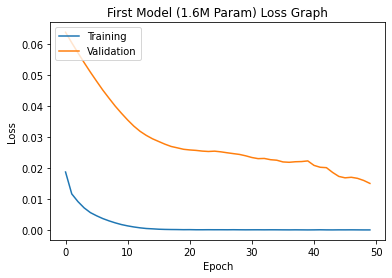

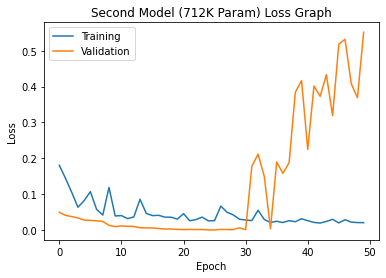

In [ ]:
# summarize history for first model loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('First Model (1.6M Param) Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# summarize history for second model loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Second Model (712K Param) Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [ ]:
predictions_1 = model_1.predict(x_test)
predictions_1 = scaler.inverse_transform(predictions_1)
rmse = np.sqrt(np.mean(predictions_1 - y_test) ** 2)
print("The Validation RMSE of the designed model is : {}".format(rmse))


19/19 [==============================] - 2s 75ms/step
The Validation RMSE of the designed model is : 57.41519009804766


In [ ]:
predictions_2 = model_2.predict(x_test)
predictions_2 = scaler.inverse_transform(predictions_2)
rmse = np.sqrt(np.mean(predictions_2 - y_test) ** 2)
print("The Validation RMSE of the designed model is : {}".format(rmse))


19/19 [==============================] - 1s 13ms/step
The Validation RMSE of the designed model is : 58.457697014719905


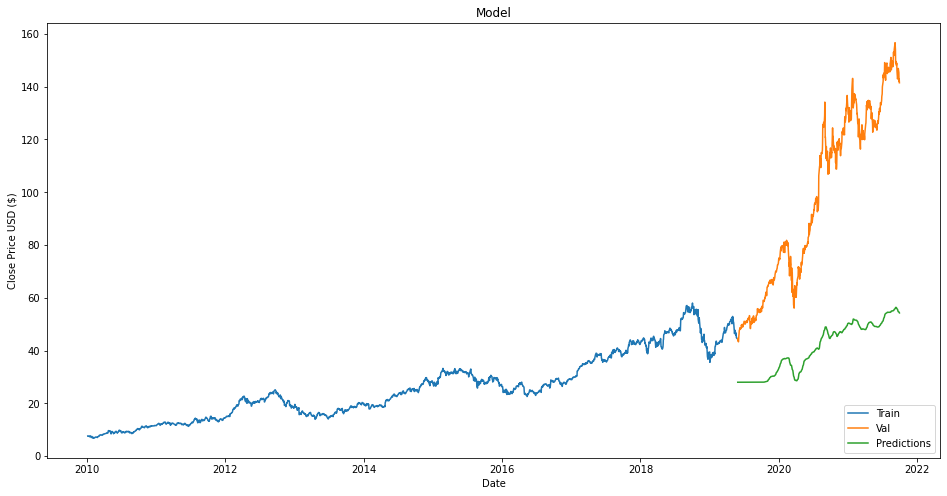

In [ ]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions_1
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

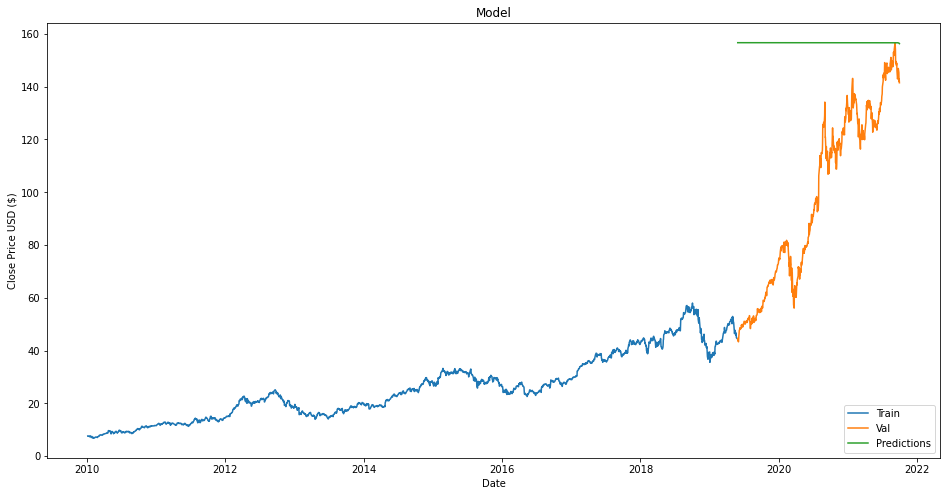

In [ ]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions_2
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()